In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that construct features and cluster your documents using K-means and a variety of cluster numbers. Interrogate the cluster contents in terms of both documents and features. Identify the "optimal" cluster number with Silhouette analysis. Plot clusters and features after reducing with PCA. What does this cluster structure reveal about the organization of documents in your corpora? 

In [2]:
#load my dataset
import pandas as pd
election_tweets = pd.read_excel("/home/rkcatipon/Content-Analysis-2020/week-5/electionday_tweets.xlsx")


In [3]:
#inspect
election_tweets.head()

,is_fake_news,fake_news_category,tweet_id,created_at,retweet_count,text,user_screen_name,user_verified,user_friends_count,user_followers_count,user_favourites_count,tweet_source,geo_coordinates,num_hashtags,num_mentions,num_urls,num_media
0,False,NaN,264033382076407808,Thu Nov 01 15:57:18 +0000 2012,4698,@realDonaldTrump you are full of shit!,RalphGilles,True,763,26680,3079,"<a href=""http://twitter.com/download/iphone"" r...",0,0,2,0,0
1,False,NaN,265895586660757505,Tue Nov 06 19:17:02 +0000 2012,9646,@realDonaldTrump you're fucking retarded,TimmyWait,False,839,397,504,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,0,2,0,0
2,False,NaN,265895723445411841,Tue Nov 06 19:17:35 +0000 2012,1823,@realDonaldTrump You are the stupidest man on ...,mattcale52,False,1184,1353,3355,"<a href=""http://twitter.com/download/iphone"" r...",0,0,2,0,0
3,False,NaN,265896172726661120,Tue Nov 06 19:19:22 +0000 2012,1168,@realDonaldTrump I am continually amazed and t...,MichaelWHill,False,1603,704,1479,"<a href=""http://twitter.com/download/iphone"" r...",0,0,2,0,0
4,False,NaN,266042962650226688,Wed Nov 07 05:02:39 +0000 2012,1979,Hey @realDonaldTrump You Mad Bro?,ThePresObama,False,135,70218,931,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,0,2,0,0


In [4]:
electiontweetsDF = pd.DataFrame(election_tweets['tweet_id'])

electiontweetsDF['is_fake_news'] = election_tweets['is_fake_news']
electiontweetsDF['fake_news_category'] = election_tweets['fake_news_category']
electiontweetsDF['text'] = election_tweets['text']

In [5]:
electiontweetsDF.head()

,tweet_id,is_fake_news,fake_news_category,text
0,264033382076407808,False,NaN,@realDonaldTrump you are full of shit!
1,265895586660757505,False,NaN,@realDonaldTrump you're fucking retarded
2,265895723445411841,False,NaN,@realDonaldTrump You are the stupidest man on ...
3,265896172726661120,False,NaN,@realDonaldTrump I am continually amazed and t...
4,266042962650226688,False,NaN,Hey @realDonaldTrump You Mad Bro?


In [6]:
#Initializing vectors
tCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
#Ttraining
tweetVects = tCountVectorizer.fit_transform(electiontweetsDF['text'])

#inspect shape
print(tweetVects.shape)

(1327, 5016)


In [7]:
tweetVects[:10,:20].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [8]:
#Okay it's looking pretty sparse right now

In [9]:
tweetVects

<1327x5016 sparse matrix of type '<class 'numpy.int64'>'
	with 21076 stored elements in Compressed Sparse Row format>

In [10]:
tCountVectorizer.vocabulary_.get('vector')

In [11]:
# Looking at tf-idf scores. term frequency of words per tweet (our document in this case)

#initialize
tweetTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(tweetVects)
#train
tweetsTF = tweetTFTransformer.transform(tweetVects)
print(tweetsTF.shape)

(1327, 5016)


In [12]:
#tf-idf per each word

#wow glad we could inspect
list(zip(tCountVectorizer.vocabulary_.keys(), tweetsTF.data))[:20]

[('realdonaldtrump', 0.2364681070436211),
 ('you', 0.654091360802711),
 ('are', 0.16040249311940685),
 ('full', 0.24287680551491947),
 ('of', 0.5741613395318621),
 ('shit', 0.31916763589905034),
 ('re', 0.23550744475771146),
 ('fucking', 0.6514340853260373),
 ('retarded', 0.15975085080014362),
 ('the', 0.3809387962489656),
 ('stupidest', 0.5912149990656038),
 ('man', 0.17569381611706494),
 ('on', 0.13670375500399504),
 ('planet', 0.48598438370986374),
 ('earth', 0.11917770427130446),
 ('am', 0.48598438370986374),
 ('continually', 0.2125064309227423),
 ('amazed', 0.3553929518121259),
 ('and', 0.48598438370986374),
 ('terribly', 0.23713887100141515)]

Now we prune the data to just terms that occur at least three times

In [14]:
#initialize
tweetTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
tweetTFVects = tweetTFVectorizer.fit_transform(electiontweetsDF['text'])

In [14]:
try:
    print(tweetTFVectorizer.vocabulary_['hate'])
except KeyError:
    print('vector is missing')
    print('The available words are: {} ...'.format(list(tweetTFVectorizer.vocabulary_.keys())[:11]))

312


In [15]:
tCountVectorizer.vocabulary_.get('trump')


4412

# K-means clustering

I do not know the optimal number of clusters to work with for my dataset so I'm going to start with two clusters, according to the category of is fake news or not. 

In [16]:
numClusters = len(set(electiontweetsDF['is_fake_news']))

km = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')


In [17]:
#fit the vectors
km.fit(tweetTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
label = electiontweetsDF['is_fake_news']

In [19]:
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(label, km.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(label, km.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(label, km.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(label, km.labels_)))

The available metrics are: ['SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'base', 'brier_score_loss', 'calinski_harabaz_score', 'check_scoring', 'classification', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'mutual_info_score', 'normalized_mutual_info_score', 'pairwise', 'pairwise_distances', 'pairwise_distances_argmin', 'pairwise_distances_arg

This is pretty small numbers for metrics. 

I don't necessarily have a true category to compare my clusters too. I would be curious to see a mapping of some of the topics

In [20]:
electiontweetsDF['kmeans_predictions'] = km.labels_
electiontweetsDF[10:20]

,tweet_id,is_fake_news,fake_news_category,text,kmeans_predictions
10,388618880605646848,False,NaN,Beautiful morning walk in Hyde Park #London wi...,0
11,427956124411641856,False,NaN,Retweet if you Agree w/ @HillaryClinton: http:...,0
12,440331541580099584,False,NaN,'@johnnyhabit: @realDonaldTrump why the fuck d...,0
13,440688053129318400,False,NaN,'@KEEMSTARx: If @realDonaldTrump was president...,0
14,484662433404162048,False,NaN,Haha @HillaryClinton just came up and asked 'A...,0
15,516382428395745280,False,NaN,@realDonaldTrump Do you pay an angry 12 year o...,0
16,537158751116357632,False,NaN,@realDonaldTrump Sadly your racism is poisonin...,0
17,587354526857957376,False,NaN,Hillary Clinton has stolen our innovative Wiki...,0
18,587364252484296705,False,NaN,yaaas @hillaryclinton,0
19,592958704196059136,False,NaN,It's clear @realdonaldtrump been racist..sayin...,0


In [21]:
#Since the numbers are so small, I wonder if there will be any distinguishing features

terms = tweetTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 realdonaldtrump
 hillaryclinton
 amp
 vote
 trump
 maga
 people
 america
 hillary
 president


Cluster 1:
 electionday
 vote
 trump
 today
 voted
 hillary
 myvote2016
 voting
 donald
 clinton




Comparing the two clusters, there are many overlapping words with "trump", "hillary", variations of voting. I'm going to try running the true label with the different types of fake news identified. One issue with this dataset is the actual number of fake news tweets is small, so the further categorization of those tweets may not be enough data to build a substansial clustering model.

In [11]:
electiontweetsDF['fake_news_category'] = electiontweetsDF['fake_news_category'].fillna(0)

In [23]:
numClusters2 = len(set(electiontweetsDF['fake_news_category']))

km = sklearn.cluster.KMeans(n_clusters=numClusters2, init='k-means++')
km.fit(tweetTFVects)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
electiontweetsDF['kmeans_predictions2'] = km.labels_

In [25]:
electiontweetsDF.head()

,tweet_id,is_fake_news,fake_news_category,text,kmeans_predictions,kmeans_predictions2
0,264033382076407808,False,0.0,@realDonaldTrump you are full of shit!,0,2
1,265895586660757505,False,0.0,@realDonaldTrump you're fucking retarded,0,2
2,265895723445411841,False,0.0,@realDonaldTrump You are the stupidest man on ...,0,2
3,265896172726661120,False,0.0,@realDonaldTrump I am continually amazed and t...,0,2
4,266042962650226688,False,0.0,Hey @realDonaldTrump You Mad Bro?,0,2


In [26]:
terms = tweetTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters2):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 electionday
 voting
 voters
 president
 election2016
 america
 day
 maga
 today
 american


Cluster 1:
 trump
 electionday
 donald
 hillary
 realdonaldtrump
 vote
 maga
 voted
 clinton
 myvote2016


Cluster 2:
 realdonaldtrump
 amp
 maga
 people
 america
 hillary
 just
 clinton
 make
 rally


Cluster 3:
 hillaryclinton
 imwithher
 realdonaldtrump
 breaking
 president
 campaign
 amp
 tonight
 debate
 don


Cluster 4:
 vote
 electionday
 today
 realdonaldtrump
 myvote2016
 don
 amp
 america
 voted
 hillaryclinton




More clusters now, according to the number of fake news categories. While we do see similarities within the clusters features, there are now key differences as well. Cluster three for example, looks like it may be more about Mike Pence's religious views and his rule on  not eating next to women who are not his wife

In [27]:
# PCA Reduction

In [28]:
# new data

PCA = sklearn.decomposition.PCA(n_components = 4).fit(tweetTFVects.toarray())
reducedPCA_data = PCA.transform(tweetTFVects.toarray())

colors = list(plt.cm.rainbow(np.linspace(0,1, numClusters2)))
colors_p = [colors[l] for l in km.labels_]

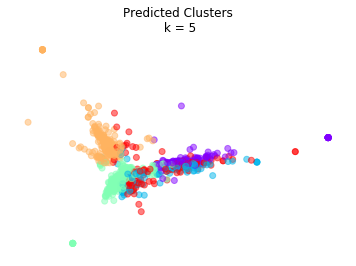

In [29]:
fig = plt.figure(2)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reducedPCA_data[:, 0], reducedPCA_data[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = {}'.format(numClusters2))
plt.show()

The close structure of the clusters points to a strong semantic overlap. From an inspection of the feature clusters, we do see tokens and similar tokens in the groups. 

In [30]:
#PCA Reduction
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(tweetTFVects.toarray())
reduced_data = pca.transform(tweetTFVects.toarray())

# Optimal clusters via Silhouette


def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


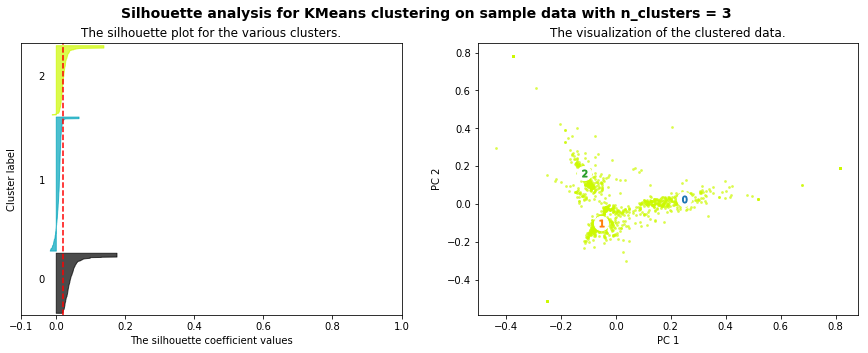

For n_clusters = 3, The average silhouette_score is : 0.022


In [31]:
# Trying different numbers of clusters

X = tweetTFVects.toarray()
plotSilhouette(3, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


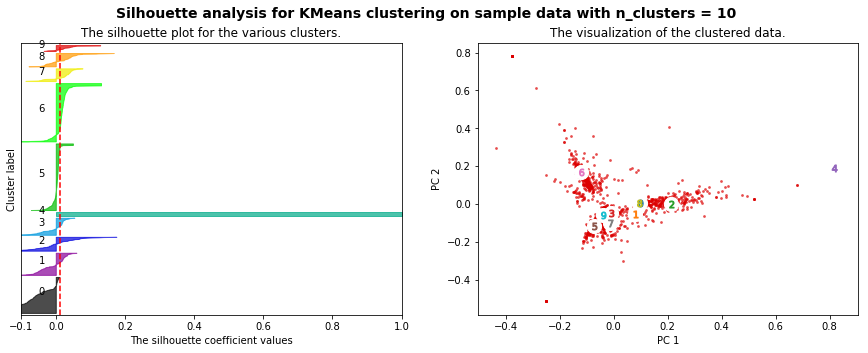

For n_clusters = 10, The average silhouette_score is : 0.013


In [32]:
#Trying with ten, does not make a lot of sense since the clusters are so close in distance

X = tweetTFVects.toarray()
plotSilhouette(10, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


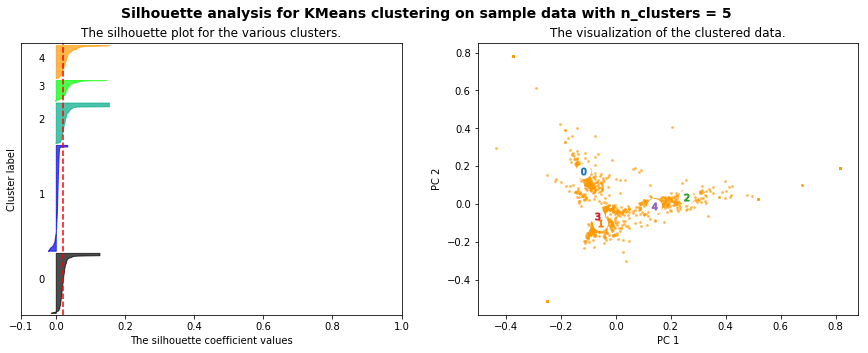

For n_clusters = 5, The average silhouette_score is : 0.019


In [33]:
# Like golidlocks, trying to find the right number

X = tweetTFVects.toarray()
plotSilhouette(5, X)

According to the silhouette analysis, the optimal of number of clusters is 3. Again thelabels of types of fake news are dependent on whether the tweet has fake news in the first place, which is rare. Out of the dataset, it's about 136 out of 1337 tweets. There are five true categories: 1) unlabeled, 2) serious fabrication, 3) large scale hoax, 4) slanted reporting of fake news, and 5) stories where the truth is contentious. But as you can tell from the true label, the human annotation is pretty nebulously defined so it make sense that there would be overlap in text features and that optimal number of clusters is less than the true labels.



## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that hierarchically cluster your documents using two approaches, and visualize them with a tree. Interrogate the recursive cluster contents in terms of both documents and closenesses. What does this nested cluster structure reveal about the organization of documents in your sampled corpora? Moreover, if they do worse than kmeans (as above), why do you think this is the case (hint: using metrics if you have ground truth or silhouette if you do not)? 

<span style="color:red">***Stretch***: Attempt using different distances into your clustering algorithms. (How) do they change the arrangement of clusters?

Applying hierarchy through Wald's method of clustering, because of the semantic overlap, I expect the content to have many nested levels and I also do not expect Wald method to perform any better than K-means clustering. 

# Wald's Method

In [34]:
tweetTFVects[:100].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Above is the  matrix of word counts per document newsgroupsTFVects

In [35]:
# word occurrence matrix -- document similarity based on shared words

tweetsCoocMat = tweetTFVects * tweetTFVects.T
#set the diagonal to 0 since we don't care how similar texts are to themselves
tweetsCoocMat.setdiag(0)



/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/scipy/sparse/compressed.py:708: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self[i, j] = values


In [36]:
selectIndices = []
indexToCat = []
for c in set(electiontweetsDF['fake_news_category']):
    selectIndices += list(electiontweetsDF[electiontweetsDF['fake_news_category'] == c].index)[:50]
    indexToCat += [c] * 50
    #.groupby('category').sum()

In [37]:
subCoocMat = tweetsCoocMat[selectIndices,:][:,selectIndices]

In [38]:
linkage_matrix = scipy.cluster.hierarchy.ward(subCoocMat.toarray())
linkage_matrix[:10]

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([[2.70000000e+01, 3.10000000e+01, 5.12342794e-02, 2.00000000e+00],
       [1.00000000e+00, 1.60000000e+01, 9.62289635e-02, 2.00000000e+00],
       [3.20000000e+01, 1.50000000e+02, 1.14184556e-01, 3.00000000e+00],
       [3.80000000e+01, 1.36000000e+02, 1.47881510e-01, 2.00000000e+00],
       [5.20000000e+01, 1.49000000e+02, 1.64284243e-01, 3.00000000e+00],
       [5.00000000e+01, 1.52000000e+02, 2.08745258e-01, 3.00000000e+00],
       [3.70000000e+01, 4.50000000e+01, 2.14828288e-01, 2.00000000e+00],
       [2.40000000e+01, 1.53000000e+02, 2.66105764e-01, 4.00000000e+00],
       [1.40000000e+01, 1.54000000e+02, 2.86116346e-01, 4.00000000e+00],
       [5.60000000e+01, 1.57000000e+02, 3.03700758e-01, 5.00000000e+00]])

In [39]:
# Visualizing the tree

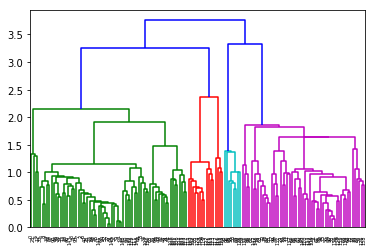

In [40]:
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, get_leaves=True)

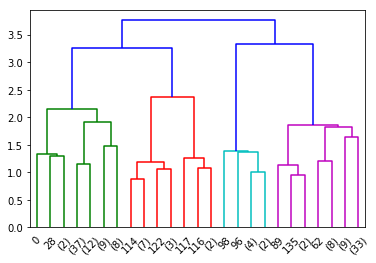

In [41]:
#Cutting trees

dendrogramDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, p=4, truncate_mode='level', get_leaves=True)

In [42]:
hierarchicalClusters = scipy.cluster.hierarchy.fcluster(linkage_matrix, 4, 'maxclust')
hierarchicalClusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4, 1, 1, 4, 4, 1, 1, 1,
       4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 1, 3, 2, 4, 4, 1, 3, 4, 4, 4, 4, 4, 1, 1,
       4, 1, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 2, 4, 4,
       3, 4, 1, 4, 4, 1, 4, 3, 3, 3, 3, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4,
       4, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 3, 1, 1, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 1, 1, 1, 4, 4], dtype=int32)

In [43]:
#homogeneity scores

linkage_matrix_full = scipy.cluster.hierarchy.ward(tweetsCoocMat.toarray())
hierarchicalClusters_full = scipy.cluster.hierarchy.fcluster(linkage_matrix_full, 4, 'maxclust')

print("For our complete clusters:")

print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(electiontweetsDF['fake_news_category'], hierarchicalClusters_full)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(electiontweetsDF['fake_news_category'], hierarchicalClusters_full)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(electiontweetsDF['fake_news_category'], hierarchicalClusters_full)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(electiontweetsDF['fake_news_category'], hierarchicalClusters_full)))

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


For our complete clusters:
Homogeneity: 0.066
Completeness: 0.026
V-measure: 0.037
Adjusted Rand Score: 0.034


In [44]:
electiontweetsDF['wald_predictions'] = hierarchicalClusters_full
electiontweetsDF.head()

,tweet_id,is_fake_news,fake_news_category,text,kmeans_predictions,kmeans_predictions2,wald_predictions
0,264033382076407808,False,0.0,@realDonaldTrump you are full of shit!,0,2,3
1,265895586660757505,False,0.0,@realDonaldTrump you're fucking retarded,0,2,3
2,265895723445411841,False,0.0,@realDonaldTrump You are the stupidest man on ...,0,2,3
3,265896172726661120,False,0.0,@realDonaldTrump I am continually amazed and t...,0,2,3
4,266042962650226688,False,0.0,Hey @realDonaldTrump You Mad Bro?,0,2,3


In [ ]:
After looking at the recursive cluster contents it tells me that the 

Interrogate the recursive cluster contents in terms of both documents and closenesses. What does this nested cluster structure reveal about the organization of documents in your sampled corpora? Moreover, if they do worse than kmeans (as above), why do you think this is the case (hint: using metrics if you have ground truth or silhouette if you do not)? 






## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that topic model documents related to your anticipated final project. Interrogate and visually plot (e.g., as a bar graph?) the topic-word loadings and the document-topic loadings. What does this topic structure reveal about the distribution of contents across your documents? Systematically vary the $\alpha$, $\eta$, and topic number of the model for your text and describe in detail whether and how these changes led to distinctive outcomes, visible to you as analyst.  

<span style="color:red">**Stretch**: Cluster your documents, but instead of using words alone, use their topic loadings as an additional set of features. Do these topic loadings increase the apparent semantic coherence of your clusters?</span> 

# Topic Modeling with GenSim


In [15]:
#Apply our functions
electiontweetsDF['tokenized_text'] = electiontweetsDF['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
electiontweetsDF['normalized_tokens'] = electiontweetsDF['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [16]:
# Reduce the tokens

def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

electiontweetsDF['reduced_tokens'] = electiontweetsDF['normalized_tokens'].apply(lambda x: dropMissing(x, tweetTFVectorizer.vocabulary_.keys()))

In [17]:
dictionary = gensim.corpora.Dictionary(electiontweetsDF['reduced_tokens'])


-- Then for each of the texts we create a list of tuples containing each token and its count. We will only use the first half of our dataset for now and will save the remainder for testing.

In [18]:
corpus = [dictionary.doc2bow(text) for text in electiontweetsDF['reduced_tokens']]

In [19]:
# doc2bow does preprocessing
# Corpus 


gensim.corpora.MmCorpus.serialize('election.mm', corpus) # I think the .mm is just a naming convention?
tweetmm = gensim.corpora.MmCorpus('election.mm')

In [20]:
tweetlda = gensim.models.ldamodel.LdaModel(corpus=tweetmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

The degree to which distinct texts load on the identified topics.

In [51]:
tweet1Bow = dictionary.doc2bow(electiontweetsDF['reduced_tokens'][0])
tweet1lda = tweetlda[tweet1Bow]
print("The topics of the text: {}".format(electiontweetsDF['fake_news_category'][0]))
print("are: {}".format(tweet1lda))


The topics of the text: 0.0
are: [(0, 0.1004303), (1, 0.10792321), (2, 0.09852464), (3, 0.097846195), (4, 0.09752218), (5, 0.10247956), (6, 0.096405536), (7, 0.09367125), (8, 0.10187331), (9, 0.10332381)]


In [52]:
ldaDF = pandas.DataFrame({
        'name' : electiontweetsDF['fake_news_category'],
        'topics' : [tweetlda[dictionary.doc2bow(l)] for l in electiontweetsDF['reduced_tokens']]
    })


#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(tweetlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(tweetlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF[1::100]

,name,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
1,0.0,"[(0, 0.04731616), (1, 0.050846323), (2, 0.0464...",0.047316,0.050846,0.046419,0.046099,0.045946,0.048282,0.574284,0.044132,0.047996,0.048679
101,0.0,"[(0, 0.1004303), (1, 0.10792321), (2, 0.098524...",0.100430,0.107923,0.098525,0.097846,0.097522,0.102480,0.096406,0.093671,0.101873,0.103324
201,0.0,"[(0, 0.1004303), (1, 0.10792321), (2, 0.098524...",0.100430,0.107923,0.098525,0.097846,0.097522,0.102480,0.096406,0.093671,0.101873,0.103324
301,0.0,"[(0, 0.03094854), (1, 0.03325755), (2, 0.03036...",0.030949,0.033258,0.030361,0.030154,0.030053,0.031584,0.029711,0.028870,0.723218,0.031843
401,0.0,"[(0, 0.01298447), (1, 0.013953848), (2, 0.0127...",0.012984,0.013954,0.012738,0.012650,0.012608,0.883964,0.012463,0.012110,0.013170,0.013358
501,0.0,"[(0, 0.1004303), (1, 0.10792321), (2, 0.098524...",0.100430,0.107923,0.098525,0.097846,0.097522,0.102480,0.096406,0.093671,0.101873,0.103324
601,0.0,"[(0, 0.011338782), (1, 0.899283), (2, 0.011123...",0.011339,0.899283,0.011124,0.011047,0.011010,0.011571,0.010884,0.010575,0.011501,0.011666
701,0.0,"[(0, 0.1004303), (1, 0.10792321), (2, 0.098524...",0.100430,0.107923,0.098525,0.097846,0.097522,0.102480,0.096406,0.093671,0.101873,0.103324
801,1.0,"[(0, 0.012984675), (1, 0.0139540965), (2, 0.01...",0.012985,0.013954,0.012738,0.012651,0.012608,0.013250,0.883174,0.012110,0.013172,0.013358
901,0.0,"[(0, 0.7940179), (1, 0.024715096), (2, 0.02255...",0.794018,0.024715,0.022559,0.022403,0.022330,0.023466,0.022074,0.021447,0.023327,0.023662


I'm suprised it showed so many topics, considering the fake news category was only 5 labels. Lrt's go check out what is in the labels.

In [53]:
ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN = ldaDF[:10][['name']]
ldaDFVis = ldaDFV.as_matrix(columns=None)
ldaDFVisNames = ldaDFVisN.as_matrix(columns=None)
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.100430,0.107923,0.098525,0.097846,0.097522,0.102480,0.096406,0.093671,0.101873,0.103324
1,0.047316,0.050846,0.046419,0.046099,0.045946,0.048282,0.574284,0.044132,0.047996,0.048679
2,0.047317,0.050847,0.046418,0.046099,0.045946,0.048285,0.045422,0.044132,0.047997,0.577537
3,0.030949,0.033265,0.376272,0.376064,0.030054,0.031582,0.029711,0.028866,0.031393,0.031843
4,0.030953,0.033258,0.030363,0.030153,0.030052,0.031580,0.721540,0.028866,0.031394,0.031841
5,0.047316,0.050846,0.046419,0.046099,0.045946,0.048282,0.574284,0.044132,0.047996,0.048679
6,0.012984,0.013954,0.012738,0.012650,0.012608,0.013250,0.012463,0.012110,0.883885,0.013358
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.919101,0.000000
8,0.030950,0.033260,0.030363,0.030152,0.030054,0.031584,0.029708,0.028866,0.031398,0.723666
9,0.030949,0.033259,0.030363,0.030153,0.030056,0.031583,0.029711,0.028866,0.031395,0.723665


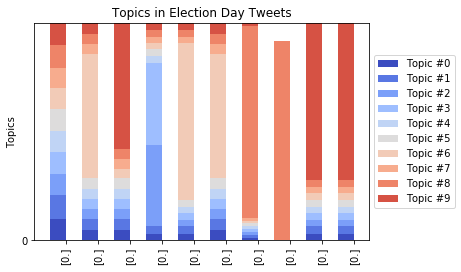

In [54]:
# Stacked bar chart of topics

N = 10
ind = np.arange(N)
K = tweetlda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Election Day Tweets')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

Clearly there are some documents that are mix of topics versus others. Document one, which in this case is a tweet, is an even probability distribution of all ten topics. For document 7, it looks to be very strongly just topc 1.

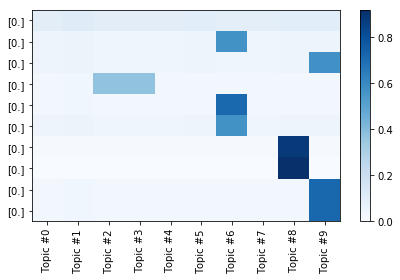

In [55]:
# Heat map
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

For every topic, it shows how strongly it identifies as one of the topics. But it would be helpful to see what the main topics are. So let's look at the terms with the highest LDA weight in topic `1`:

In [56]:
#topic 1

tweetlda.show_topic(1)

[('vote', 0.12240492),
 ('electionday', 0.05050168),
 ('amp', 0.032120503),
 ('trump', 0.03166295),
 ('america', 0.02810236),
 ('hillary', 0.018524624),
 ('today', 0.013737684),
 ('poll', 0.012938607),
 ('day', 0.012928432),
 ('need', 0.009995619)]

In [63]:
# topc 4
tweetlda.show_topic(4)

[('maga', 0.028761834),
 ('people', 0.021187501),
 ('america', 0.01985796),
 ('imwithher', 0.019826977),
 ('poll', 0.01811643),
 ('want', 0.01633014),
 ('great', 0.01630817),
 ('amp', 0.014578722),
 ('electionday', 0.012815964),
 ('like', 0.012773988)]


To be honest, these two topics look very similar. The only semantic difference I might venture to guess is different between the two is that the first has the salient feature of "I'm with here" which was the Clinton slogan. The sixth topc looks focus on the presidential race itself with terms like "candidate" and "win". The differences are hard to detect at this level, so it would be helpful to compare across topics and to identify what the delta is between the topics.

In [73]:
# let's inspect what words are being for topics!

# a dictionary for the topics and their word

topicsDict = {}
for topicNum in range(tweetlda.num_topics):
    topicWords = [w for w, p in tweetlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,vote,vote,want,electionday,vote,vote,vote,electionday,amp,trump
1,electionday,electionday,electionday,vote,electionday,electionday,electionday,trump,vote,vote
2,know,day,amp,trump,trump,trump,trump,america,electionday,clinton
3,people,imwithher,american,poll,hillary,maga,president,vote,trump,electionday
4,today,let,hillary,maga,maga,amp,win,big,like,hillary
5,amp,amp,support,amp,today,poll,think,hillary,voter,myvote2016
6,hillary,president,americans,donald,rally,watch,candidate,country,email,president
7,woman,rt,time,day,america,today,hillary,right,america,election
8,makeamericagreatagain,election,ask,support,clinton,people,ready,maga,poll,rt
9,trump,america,america,america,poll,donald,america,need,president,people


𝛼 and 𝜂 parameters of the model. 𝛼 controls the sparsity of document-topic loadings, and 𝜂

controls the sparsity of topic-word loadings.

<Figure size 432x288 with 0 Axes>

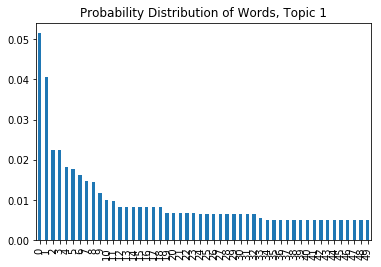

In [74]:
# Topic distribution comparisons
topic1_df = pandas.DataFrame(tweetlda.show_topic(1, topn=50))
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()


In [76]:
#See how different 𝜂 values can change the shape of the distribution.

In [79]:
tweetlda1 = gensim.models.ldamodel.LdaModel(corpus=tweetmm, id2word=dictionary, num_topics=10, eta = 0.00001)
tweetlda2 = gensim.models.ldamodel.LdaModel(corpus=tweetmm, id2word=dictionary, num_topics=10, eta = 0.9)

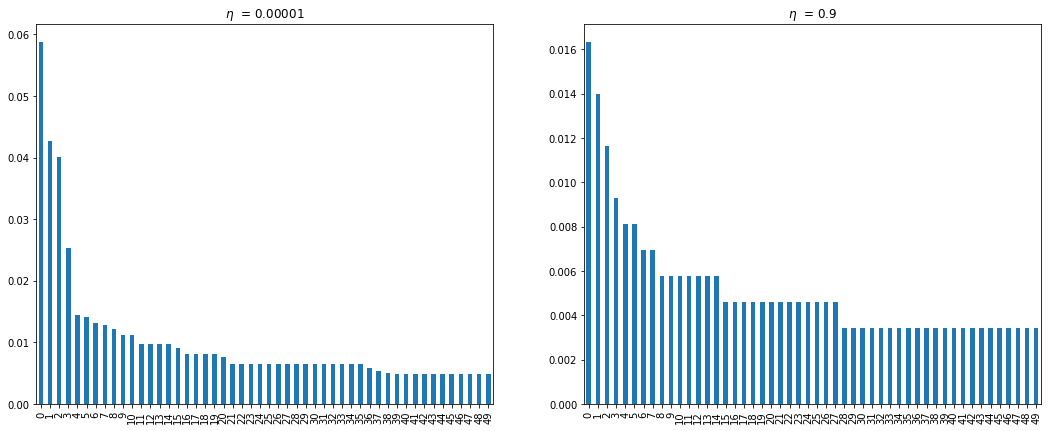

In [81]:
topic1_1_df = pandas.DataFrame(tweetlda1.show_topic(1, topn=50)) # renamed to show that it's different topic ones
topic2_1_df = pandas.DataFrame(tweetlda2.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic1_1_df.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.00001')
topic2_1_df.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

I wish the axis were normalized for both graphs but the differences between words across the topic is lower with a higher 𝜂 , sparsity of word-topi loadings.

Topic one with the lower sparsity is more focused on the Hillary Clinton's campaign.

In [87]:
topic1_1_df[:20]

,0,1
0,vote,0.058801
1,trump,0.042663
2,electionday,0.040133
3,break,0.025398
4,campaign,0.014501
5,people,0.014109
6,voter,0.013219
7,amp,0.012890
8,poll,0.012100
9,imwithher,0.011278


Topic one with the higher sparsity (.09) is more focused on words used in the Trump campaign such as border and MAGA. So even though the words have similarity, we do see document divergence with the tunning of n.

In [88]:
topic2_1_df[:20]

,0,1
0,trump,0.016343
1,want,0.013991
2,electionday,0.011642
3,maga,0.009289
4,america,0.008113
5,today,0.008113
6,american,0.006937
7,movement,0.006937
8,hillary,0.005761
9,support,0.005761


## <span style="color:red">*Exercise 4*</span>

<span style="color:red">Construct cells immediately below this that use topic models and networks, or dynamic topic models on datasets relevant to your final project. You can also extend the analysis of the COHA or Soap datasets, if relevant to the comparison of data for your projects. (You could possibly use coha_genres dictionary to conduct analysis on topic evolution for a particular genre? What themes do you see evolving throughout these corpora?). What can you see from the analysis? I encourage you to explore the tutorial and see what else you can do with this dataset. 

So far in this notebook, I've been working with a dataset that is a collection of tweets that look at fake news. In my last notebook, I used the same dataset to make a co-mentions network. I am very interested in dynamic topic modelling and since the tweet dataset spans a few years, it may be interesting to see how topics change over the years.

# Network topic modelling

### Dynamic Topic Modelling

In [21]:
electiontweetsDF['time'] = election_tweets['created_at']


In [22]:
electiontweetsDF['time'][:3]

0    Thu Nov 01 15:57:18 +0000 2012
1    Tue Nov 06 19:17:02 +0000 2012
2    Tue Nov 06 19:17:35 +0000 2012
Name: time, dtype: object

In [23]:
x = []
for date in electiontweetsDF['time']:
    x.append(date.split(' '))

electiontweetsDF['date'] = x

In [89]:
electiontweetsDF.head()

,tweet_id,is_fake_news,fake_news_category,text,kmeans_predictions,kmeans_predictions2,wald_predictions,tokenized_text,normalized_tokens,reduced_tokens,time,date
0,264033382076407808,False,0.0,@realDonaldTrump you are full of shit!,0,2,3,"[@realDonaldTrump, you, are, full, of, shit]","[@realdonaldtrump, shit]",[],Thu Nov 01 15:57:18 +0000 2012,"[Thu, Nov, 01, 15:57:18, +0000, 2012]"
1,265895586660757505,False,0.0,@realDonaldTrump you're fucking retarded,0,2,3,"[@realDonaldTrump, you, 're, fucking, retarded]","[@realdonaldtrump, fuck, retard]",[fuck],Tue Nov 06 19:17:02 +0000 2012,"[Tue, Nov, 06, 19:17:02, +0000, 2012]"
2,265895723445411841,False,0.0,@realDonaldTrump You are the stupidest man on ...,0,2,3,"[@realDonaldTrump, You, are, the, stupidest, m...","[@realdonaldtrump, stupid, man, planet, earth]",[man],Tue Nov 06 19:17:35 +0000 2012,"[Tue, Nov, 06, 19:17:35, +0000, 2012]"
3,265896172726661120,False,0.0,@realDonaldTrump I am continually amazed and t...,0,2,3,"[@realDonaldTrump, I, am, continually, amazed,...","[@realdonaldtrump, continually, amaze, terribl...","[money, hope]",Tue Nov 06 19:19:22 +0000 2012,"[Tue, Nov, 06, 19:19:22, +0000, 2012]"
4,266042962650226688,False,0.0,Hey @realDonaldTrump You Mad Bro?,0,2,3,"[Hey, @realDonaldTrump, You, Mad, Bro]","[hey, @realdonaldtrump, mad, bro]","[hey, mad]",Wed Nov 07 05:02:39 +0000 2012,"[Wed, Nov, 07, 05:02:39, +0000, 2012]"


In [96]:
electiontweetsDF['date']

['Thu', 'Nov', '01', '15:57:18', '+0000', '2012']

In [108]:
electiontweetsDF['normalized_tokens'][1]

['@realdonaldtrump', 'fuck', 'retard']

In [123]:
#creating dictionaries for information
tweet_categories = {}
tweet_years = {}


for tweet in electiontweetsDF['normalized_tokens']:
    for category in electiontweetsDF['fake_news_category']:
        if category not in tweet_categories:
            tweet_categories[category] = []
        if category in tweet_categories:
            tweet_categories[category].append(tweet)

    for date in electiontweetsDF['date']:
        year = date[-1]
        if year not in tweet_years:
            tweet_years[year] = []
        if year in tweet_years:
            tweet_years[year].append(tweet)


In [ ]:
# For every year, add the text that belongs to that year!

In [115]:
#checking the categories
print(tweet_categories.keys())
print(tweet_years.keys())

dict_keys([0.0, 1.0, 5.0, 4.0, 2.0])
dict_keys(['2012', '2013', '2014', '2015', '2016'])


In [117]:
len(tweet_years['2016'])

1694579

This tells us that the tweets range from 2012 to 2016. Now we can look at the distribution of the categories over the 4 year period. 


What does this tell us about emerging genres? It tell us that there have been some shifts in the past few years. But I would probably be more interested in seeing the topics evolution than the prelabeled genres...

In [118]:
# preprocessing for gensim requirements, organize by year
import collections

In [119]:
years = []
years_lens = []

In [120]:
for year_info in collections.OrderedDict(sorted(tweet_years.items())):
    years.append(year_info)
    years_lens.append(len((tweet_years[year_info])))

In [121]:
years[0], years[-1]

('2012', '2016')

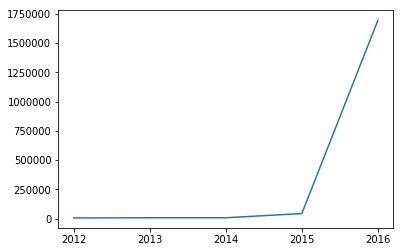

In [122]:
import matplotlib.pyplot as plt
plt.plot(years, years_lens)

Unsurprisingly, we see that the number of tweets skyrocket as the 2016 election approaches. This is due to the data collection process done by the original researchers who used the Twitter API to gather posts that had the hashtags #MyVote2016, #ElectionDay, #electionnight, and had the user handles @realDonaldTrump and @HillaryClinton (Lopez, et al, 2017). One thing to note, is that though the researchers started collection from 2016 to 2017, there are tweets in the dataset that go as far back as 2012. This is because some tweets may have been created earlier, but became viral during the election.

Unlike the example notebook, I do not need to slice up the years since it's only a four year span from 2012 to 2016.

In [29]:
# we did this before, but one more time for good measure
dictionary = gensim.corpora.Dictionary(electiontweetsDF['reduced_tokens'])
corpus = [dictionary.doc2bow(text) for text in electiontweetsDF['reduced_tokens']]

#serialize and load
gensim.corpora.MmCorpus.serialize('tweet.mm', corpus) 
tweetcorpus = gensim.corpora.MmCorpus('tweet.mm')

I need to count how many tweets are in each year bin.

In [34]:
list2012 = []
list2013 = []
list2014 = []
list2015 = []
list2016 = []
for list1 in electiontweetsDF['date']:
    x = list1[-1]
    if x == '2012':
        counter += 1
    if x == '2013':
        counter2 += 1
    if x == '2014':
        counter3 += 1
    if x == '2015':
        list2015.append(x)
    if x == '2016':
        list2016.append(x)
        

In [35]:
print(len(list2012))
print(len(list2013))
print(len(list2014))
print(len(list2015))
print(len(list2016))

5
6
6
33
1277


In [36]:
# run topic model, lukcily the data is already sorted by year
from gensim.models import ldaseqmodel
ldaseq = ldaseqmodel.LdaSeqModel(corpus=corpus, id2word=dictionary, time_slice=[5,6,6,33,1277], num_topics=4)

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldaseqmodel.py:1043: RuntimeWarning: invalid value encountered in double_scalars
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldaseqmodel.py:230: RuntimeWarning: divide by zero encountered in double_scalars
  convergence = np.fabs((bound - old_bound) / old_bound)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldaseqmodel.py:1043: RuntimeWarning: invalid value encountered in double_scalars
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldaseqmodel.py:1043: RuntimeWarning: invalid value encountered in double_scalars
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldaseqmodel.py:1043: RuntimeW

In [37]:
# output inspection
ldaseq.print_topics(time=0)[1]

[('people', 0.02788953500605213),
 ('amp', 0.023409461556988954),
 ('trump', 0.02276672311621498),
 ('like', 0.02015297586397476),
 ('rally', 0.0196637491318766),
 ('need', 0.018082757534443907),
 ('american', 0.01692667568528261),
 ('america', 0.016652993478155652),
 ('poll', 0.016642176040131254),
 ('say', 0.014059909295741753),
 ('want', 0.012138202890215574),
 ('thank', 0.011654257012749712),
 ('stand', 0.01144714262141817),
 ('think', 0.011361705964124169),
 ('work', 0.010879043436648089),
 ('ready', 0.0107724524693978),
 ('lead', 0.010624824178117978),
 ('watch', 0.01034349515679495),
 ('campaign', 0.00963203476834255),
 ('maga', 0.009446138891111884)]

In [38]:
ldaseq.print_topics(time=4)[1]

[('people', 0.028559905276335555),
 ('amp', 0.02377874597874176),
 ('trump', 0.02307152316965928),
 ('like', 0.019901223007185272),
 ('rally', 0.019888524896073755),
 ('need', 0.018090279516304087),
 ('american', 0.017174115020024538),
 ('america', 0.01694320237753229),
 ('poll', 0.016818415866728186),
 ('say', 0.014109541641230718),
 ('want', 0.01226422086825023),
 ('thank', 0.011681865193179757),
 ('stand', 0.011502354629847718),
 ('think', 0.011169303400580663),
 ('work', 0.010938922792754102),
 ('ready', 0.010845239954510245),
 ('lead', 0.0106959377803999),
 ('watch', 0.010408864525920825),
 ('campaign', 0.009660053451655791),
 ('maga', 0.009492518447823456)]

In [39]:
loaded_model = ldaseqmodel.LdaSeqModel.load("ldaseqmodel")